In [1]:
#Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading the Train Data

In [2]:
path = "F:\Datasets\Final Participant Data Folder\Final_Train.xlsx"
train = pd.read_excel('F:\Datasets\Final Participant Data Folder\Final_Train.xlsx')
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


# Reading the Test Data

In [3]:
path = "F:\Datasets\Final Participant Data Folder\Final_Test.xlsx"
test = pd.read_excel('F:\Datasets\Final Participant Data Folder\Final_Test.xlsx')
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


# Finding the no of rows and columns of Train Data

In [4]:
train.shape

(5961, 7)

# Finding the no of rows and columns of Test Data

In [5]:
test.shape

(1987, 6)

In [6]:
train=pd.concat([train,test],axis=0)

In [7]:
train.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%


In [10]:
train['City'] = train['Place'].str.split(', ').str[-1]
train['Area'] = train['Place'].str.split(', ').str[0]
test['City'] = test['Place'].str.split(', ').str[-1]
test['Area'] = test['Place'].str.split(', ').str[0]
train.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,City,Area
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,Ernakulam,Kakkanad
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,Bangalore,Whitefield
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,Bangalore,Mathikere - BEL
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,Bangalore,Bannerghatta Road
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,Chennai,Keelkattalai


In [12]:
count = train.groupby(['City']).count()
count.Qualification

City
Bangalore             1678
Chennai               1142
Coimbatore             298
Delhi                 1602
Ernakulam              201
Hyderabad             1284
Mumbai                1608
Thiruvananthapuram     103
e                        1
Name: Qualification, dtype: int64

In [14]:
val = train[train['City'] == 'e'].index
val

Int64Index([3980], dtype='int64')

In [15]:
train = train.drop([3980])

In [17]:
train['Rating'].fillna('0%',inplace = True)
train['Rating'] = train['Rating'].str[0:-1].astype(float)

test['Rating'].fillna('0%',inplace = True)
test['Rating'] = test['Rating'].str[0:-1].astype(float)

train.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,City,Area
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100.0,Ernakulam,Kakkanad
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98.0,Bangalore,Whitefield
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0.0,Bangalore,Mathikere - BEL
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0.0,Bangalore,Bannerghatta Road
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100.0,Chennai,Keelkattalai


# Finding the types of columns

In [119]:
train.columns

Index(['Experience', 'Fees', 'Miscellaneous_Info', 'Place', 'Profile',
       'Qualification', 'Rating', 'City', 'Area', 'Profile_Ayurveda',
       ...
       'Qual_593', 'Qual_594', 'Qual_595', 'Qual_596', 'Qual_597', 'Qual_598',
       'Qual_599', 'Qual_600', 'Reviewers', 'Rev_Len'],
      dtype='object', length=625)

# Describing the data

In [120]:
train.describe()

,Experience,Fees,Rating,Area,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,...,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,Qual_1,Reviewers,Rev_Len
count,7947.000000,5960.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,...,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,7947.000000,2059.000000
mean,23.005285,307.954362,42.326790,445.284762,0.130489,0.231156,0.172770,0.121178,0.203473,0.140934,...,0.143702,0.037498,0.201586,0.025293,0.161570,0.202341,0.012961,18.873160,10.136404,1.772220
std,20.891976,190.934916,47.324677,278.476176,0.336862,0.421599,0.378072,0.326354,0.402607,0.347975,...,0.350809,0.189992,0.401209,0.157022,0.368079,0.401770,0.113113,5.433975,39.903619,0.725146
min,0.000000,5.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,1.000000
25%,6.000000,150.000000,0.000000,208.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,1.000000
50%,15.000000,300.000000,0.000000,440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,2.000000
75%,35.000000,500.000000,96.000000,676.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,2.000000
max,63.000000,950.000000,100.000000,935.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,854.000000,13.000000


In [121]:
train.describe(include= "all")

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,City,Area,Profile_Ayurveda,...,Qual_593,Qual_594,Qual_595,Qual_596,Qual_597,Qual_598,Qual_599,Qual_600,Reviewers,Rev_Len
count,7947.000000,5960.000000,4494,7916,7947,7947,7947.000000,7916,7947.000000,7947.000000,...,1,1,1,1,1,1,1,1,7947.000000,2059.000000
unique,NaN,NaN,3980,947,6,1801,NaN,8,NaN,NaN,...,1,1,1,1,1,1,1,1,NaN,NaN
top,NaN,NaN,Acrylic Partial Denture Crowns and Bridges Fix...,"HSR Layout, Bangalore",Dentist,BDS,NaN,Bangalore,NaN,NaN,...,s,,(,P,G,C,E,),NaN,NaN
freq,NaN,NaN,50,97,1837,631,NaN,1678,NaN,NaN,...,1,1,1,1,1,1,1,1,NaN,NaN
mean,23.005285,307.954362,NaN,NaN,NaN,NaN,42.326790,NaN,445.284762,0.130489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.136404,1.772220
std,20.891976,190.934916,NaN,NaN,NaN,NaN,47.324677,NaN,278.476176,0.336862,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.903619,0.725146
min,0.000000,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,6.000000,150.000000,NaN,NaN,NaN,NaN,0.000000,NaN,208.500000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
50%,15.000000,300.000000,NaN,NaN,NaN,NaN,0.000000,NaN,440.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000
75%,35.000000,500.000000,NaN,NaN,NaN,NaN,96.000000,NaN,676.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000


# Finding the information out of data

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7947 entries, 0 to 1986
Columns: 625 entries, Experience to Rev_Len
dtypes: float64(5), int32(1), int64(1), object(604), uint8(14)
memory usage: 37.2+ MB


# Finding out the datatypes

In [123]:
train.dtypes

Experience                  float64
Fees                        float64
Miscellaneous_Info           object
Place                        object
Profile                      object
Qualification                object
Rating                      float64
City                         object
Area                        float64
Profile_Ayurveda              uint8
Profile_Dentist               uint8
Profile_Dermatologists        uint8
Profile_ENT Specialist        uint8
Profile_General Medicine      uint8
Profile_Homeopath             uint8
City_Bangalore                uint8
City_Chennai                  uint8
City_Coimbatore               uint8
City_Delhi                    uint8
City_Ernakulam                uint8
City_Hyderabad                uint8
City_Mumbai                   uint8
City_Thiruvananthapuram       uint8
Qual_1                        int64
Qual_2                       object
Qual_3                       object
Qual_4                       object
Qual_5                      

# Finding out Unique Values

In [18]:
train['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [19]:
temp = pd.get_dummies(train[['Profile', 'City']], prefix_sep = '_', prefix = ['Profile', 'City'])
train = pd.concat([train, temp], axis=1, join = 'inner')
train.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,City,Area,Profile_Ayurveda,...,Profile_General Medicine,Profile_Homeopath,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100.0,Ernakulam,Kakkanad,0,...,0,1,0,0,0,0,1,0,0,0
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98.0,Bangalore,Whitefield,1,...,0,0,1,0,0,0,0,0,0,0
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0.0,Bangalore,Mathikere - BEL,0,...,0,0,1,0,0,0,0,0,0,0
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0.0,Bangalore,Bannerghatta Road,1,...,0,0,1,0,0,0,0,0,0,0
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100.0,Chennai,Keelkattalai,1,...,0,0,0,1,0,0,0,0,0,0


In [20]:
temp = pd.get_dummies(test[['Profile', 'City']], prefix_sep = '_', prefix = ['Profile', 'City'])
test = pd.concat([test, temp], axis=1, join = 'inner')
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City,Area,Profile_Ayurveda,Profile_Dentist,...,Profile_General Medicine,Profile_Homeopath,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram
0,MBBS,35 years experience,0.0,"Ghatkopar East, Mumbai",General Medicine,NaN,Mumbai,Ghatkopar East,0,0,...,1,0,0,0,0,0,0,0,1,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,0.0,"West Marredpally, Hyderabad",ENT Specialist,NaN,Hyderabad,West Marredpally,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"MBBS, DDVL",40 years experience,70.0,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai,KK Nagar,0,0,...,0,0,0,1,0,0,0,0,0,0
3,BAMS,0 years experience,0.0,"New Ashok Nagar, Delhi",Ayurveda,NaN,Delhi,New Ashok Nagar,1,0,...,0,0,0,0,0,1,0,0,0,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100.0,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore,Kanakpura Road,0,1,...,0,0,1,0,0,0,0,0,0,0


In [21]:
def sortQual(text):
    arr = re.sub(r'\(.*?\)', lambda x: x.group().replace(",","-"), text) # to replace ',' with '-' inside brackets only
    return (sorted(arr.lower().replace(" ","").split(",")))

In [23]:
test.iloc[1287]['Qualification']

'BDS, PG Diploma in Conservative, Endodontics and Aesthetic Dentistry, Fellowship In Clinical Cosmetology, PG Diploma In Clinical Cosmetology (PGDCC), MBA - Hospital Management, Diploma in Cosmetic Dentistry, Fellow of Academy of General Education (FAGE), Advanced Retreatment Course in RCT, Advanced Endotontic Course On Root Canal, Certified Course in Oral Surgery, MIDA, Certification in Prosthodontics & Periodontology, Certified Advanced Course in Wisdom Tooth Extraction, Certificate in Cosmetic Dentistry, Fellowship in Aesthetic Dentistry (FAD), Post Graduate Certificate in Endodontics (PGCE)'

In [28]:
qual_dict = {}
train_quals = []
test_quals = []
train_quals.append(list(train['Qualification'].values))
test_quals.append(list(test['Qualification'].values))
for quals in train_quals[0]:
    for item in quals:
        if item in qual_dict:
            qual_dict[item] += 1
        else:
            qual_dict[item] = 1
            
for quals in test_quals[0]:
    for item in quals:
        if item in qual_dict:
            qual_dict[item] += 1
        else:
            qual_dict[item] = 1

In [29]:
qual_df = pd.DataFrame.from_dict(dict(sorted(qual_dict.items(), key = lambda x : x[1] , reverse = True)), orient = 'index').reset_index()
qual_df.columns = ['Qualification', 'Count']
qual_df.tail()

,Qualification,Count
58,:,2
59,”,2
60,q,2
61,3,1
62,9,1


In [30]:
x = qual_df[qual_df['Qualification'] == '39yearsexperience'].index
qual_df = qual_df.drop(x)

In [31]:
qual_df["Code"] = qual_df["Qualification"].astype('category').cat.codes
qual_df.head()

,Qualification,Count,Code
0,,37693,0
1,o,17875,49
2,e,16649,40
3,B,15276,13
4,M,14933,24


In [32]:
qual_df.tail()

,Qualification,Count,Code
58,:,2,11
59,”,2,62
60,q,2,51
61,3,1,9
62,9,1,10


In [42]:
conversion_dict = dict(zip(qual_df['Qualification'], qual_df['Code']))
conversion_dict['39yearsexperience'] = -1

In [44]:
stat_test = test.Qualification.apply(lambda x: len(x))
stat_test.idxmax()
test[test['Qualification'].str.len()>10]['Qualification']
stat_test.idxmax()
test.iloc[1287]['Qualification']

'BDS, PG Diploma in Conservative, Endodontics and Aesthetic Dentistry, Fellowship In Clinical Cosmetology, PG Diploma In Clinical Cosmetology (PGDCC), MBA - Hospital Management, Diploma in Cosmetic Dentistry, Fellow of Academy of General Education (FAGE), Advanced Retreatment Course in RCT, Advanced Endotontic Course On Root Canal, Certified Course in Oral Surgery, MIDA, Certification in Prosthodontics & Periodontology, Certified Advanced Course in Wisdom Tooth Extraction, Certificate in Cosmetic Dentistry, Fellowship in Aesthetic Dentistry (FAD), Post Graduate Certificate in Endodontics (PGCE)'

In [45]:
stat_train = train.Qualification.apply(lambda x: len(x))
stat_train.max()

600

In [47]:
train_quals = []
for i in range(stat_train.max()):
    col_name = 'Qual_' + str(i+1)
    train_quals.append(col_name)
    col_i = train['Qualification'].str[i]
    train[col_name] = col_i
train.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,City,Area,Profile_Ayurveda,...,Qual_591,Qual_592,Qual_593,Qual_594,Qual_595,Qual_596,Qual_597,Qual_598,Qual_599,Qual_600
0,16.0,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100.0,Ernakulam,Kakkanad,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98.0,Bangalore,Whitefield,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63.0,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0.0,Bangalore,Mathikere - BEL,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0.0,Bangalore,Bannerghatta Road,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100.0,Chennai,Keelkattalai,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
test_quals = []
for j in range(stat_test.max()):
    col_name = 'Qual_' + str(j+1)
    test_quals.append(col_name)
    col_j = test['Qualification'].str[j]
    test[col_name] = col_j    
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City,Area,Profile_Ayurveda,Profile_Dentist,...,Qual_591,Qual_592,Qual_593,Qual_594,Qual_595,Qual_596,Qual_597,Qual_598,Qual_599,Qual_600
0,MBBS,35 years experience,0.0,"Ghatkopar East, Mumbai",General Medicine,NaN,Mumbai,Ghatkopar East,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,0.0,"West Marredpally, Hyderabad",ENT Specialist,NaN,Hyderabad,West Marredpally,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"MBBS, DDVL",40 years experience,70.0,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai,KK Nagar,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAMS,0 years experience,0.0,"New Ashok Nagar, Delhi",Ayurveda,NaN,Delhi,New Ashok Nagar,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100.0,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore,Kanakpura Road,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"BDS, MDS",14 years experience,90.0,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...,Chennai,Velachery,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",23 years experience,94.0,"Frazer Town, Bangalore",ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore",Bangalore,Frazer Town,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"BDS, MDS - Pedodontics",9 years experience,94.0,"Attapur, Hyderabad",Dentist,RCT - Root Canal Treatment Ceramic Veneers / C...,Hyderabad,Attapur,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"MD - Ayurveda Medicine, BAMS, Yoga Teachers Tr...",11 years experience,99.0,"Banashankari, Bangalore",Ayurveda,"99% 203 Feedback Banashankari, Bangalore",Bangalore,Banashankari,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BHMS,44 years experience,0.0,"Mayur Vihar Ph-I, Delhi",Homeopath,NaN,Delhi,Mayur Vihar Ph-I,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
train.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,City,Area,Profile_Ayurveda,...,Qual_591,Qual_592,Qual_593,Qual_594,Qual_595,Qual_596,Qual_597,Qual_598,Qual_599,Qual_600
0,16.0,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100.0,Ernakulam,Kakkanad,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98.0,Bangalore,Whitefield,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63.0,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0.0,Bangalore,Mathikere - BEL,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0.0,Bangalore,Bannerghatta Road,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100.0,Chennai,Keelkattalai,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plotting Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016B6934CDA0>,
      dtype=object)

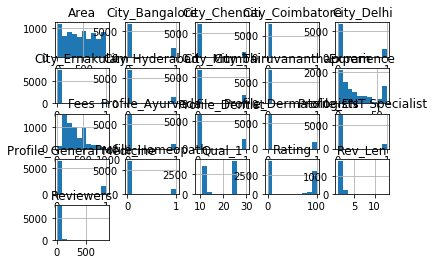

In [124]:
train.hist()

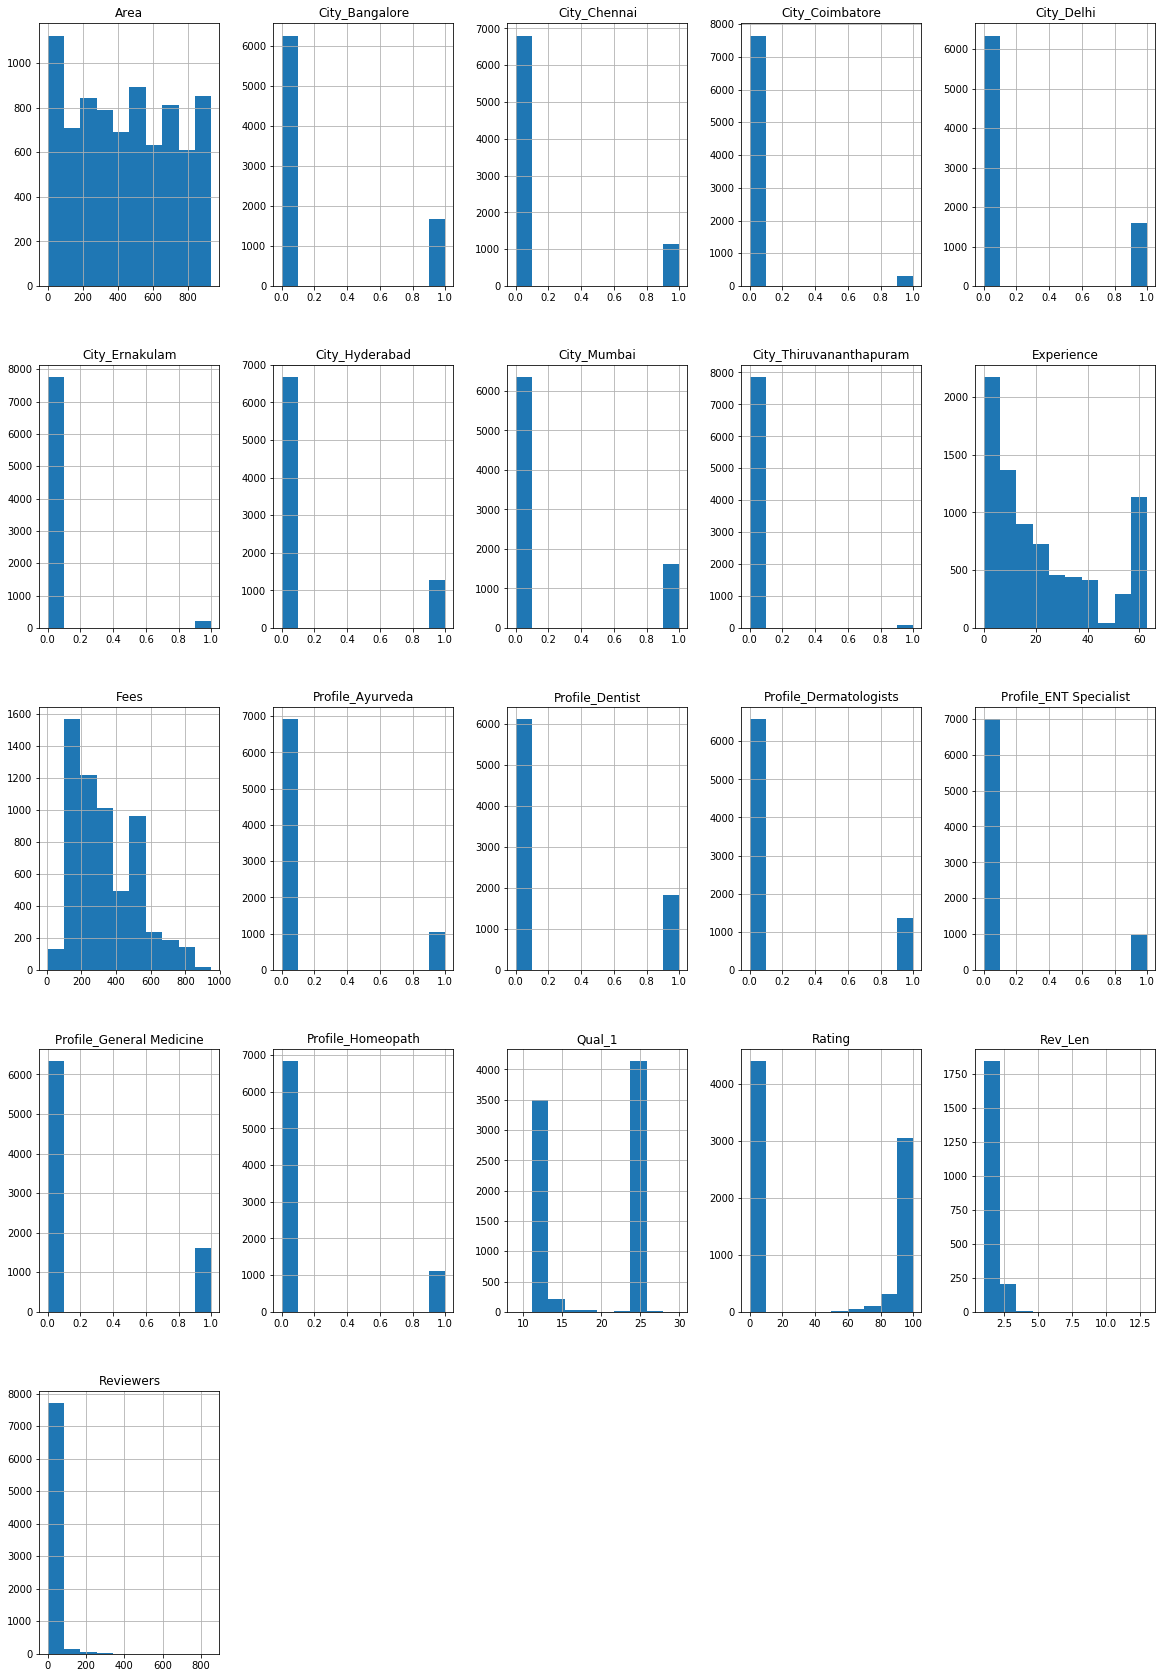

In [126]:
train.hist(figsize=(20,30))
plt.show()

# EDA

# Univariate Analysis

In [127]:
import seaborn as sn

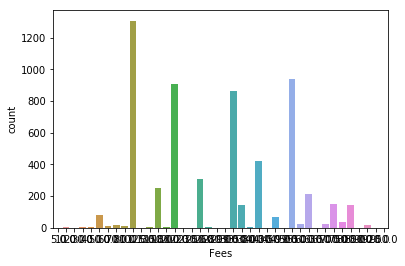

In [131]:
sn.countplot(train['Fees']);

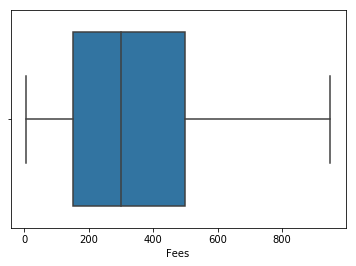

In [133]:
sn.boxplot(train["Fees"])

In [134]:
import matplotlib.pyplot as plt
import seaborn as sn

# Bivariate Analysis

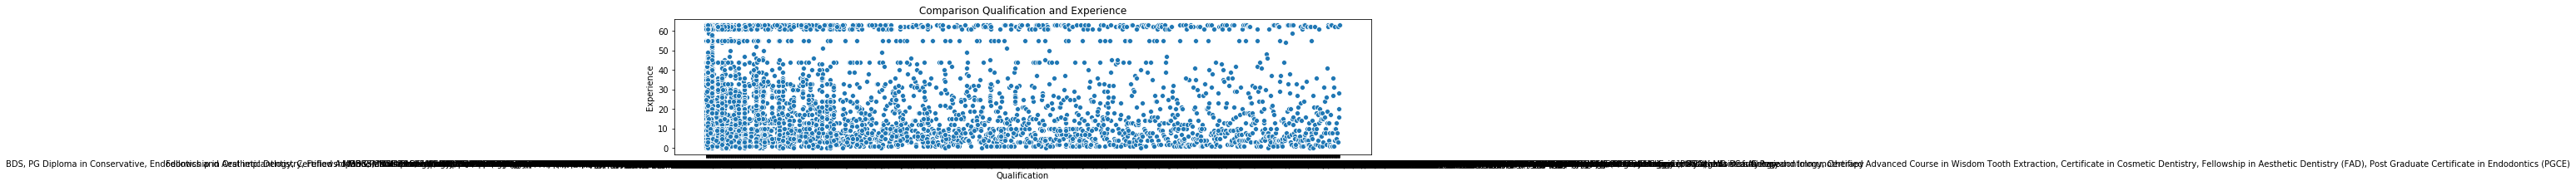

In [135]:
plt.figure(figsize=[15,3])
plt.title('Comparison Qualification and Experience')
sn.scatterplot(train['Qualification'], train['Experience']);

# Finding out Correlation

In [137]:
cor=train.corr()

In [138]:
cor

,Experience,Fees,Rating,Area,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,...,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,Qual_1,Reviewers,Rev_Len
Experience,1.000000,-0.048549,-0.095660,0.004680,0.002531,0.028495,0.004457,-0.031325,0.001997,-0.014748,...,-0.009084,-0.001096,0.002575,0.000381,0.028447,0.012182,0.022338,0.000707,-0.059040,-0.056084
Fees,-0.048549,1.000000,0.153239,-0.048457,-0.140835,-0.202091,0.204408,0.155068,0.015439,-0.003093,...,-0.052200,-0.160515,0.143399,-0.101618,-0.001019,0.000899,-0.089163,0.248092,0.089216,0.056363
Rating,-0.095660,0.153239,1.000000,-0.035310,-0.157253,0.226864,0.147951,-0.034164,-0.125342,-0.106318,...,-0.066391,-0.061801,0.017627,-0.032765,-0.001926,-0.031344,-0.063634,-0.003297,0.287395,0.156221
Area,0.004680,-0.048457,-0.035310,1.000000,-0.014995,0.020620,-0.044997,-0.002400,0.044422,-0.010723,...,0.076596,0.107191,0.114341,-0.000217,-0.057243,-0.141489,0.060528,0.007677,-0.020317,-0.037053
Profile_Ayurveda,0.002531,-0.140835,-0.157253,-0.014995,1.000000,-0.212415,-0.177040,-0.143851,-0.195796,-0.156908,...,-0.075631,-0.076464,-0.024251,-0.014819,-0.028976,0.083849,0.011757,-0.362214,-0.048230,-0.054909
Profile_Dentist,0.028495,-0.202091,0.226864,0.020620,-0.212415,1.000000,-0.250585,-0.203608,-0.277132,-0.222090,...,0.030649,0.179292,-0.053058,0.107480,0.002591,-0.053271,0.074396,-0.442761,-0.070053,0.030173
Profile_Dermatologists,0.004457,0.204408,0.147951,-0.044997,-0.177040,-0.250585,1.000000,-0.169700,-0.230980,-0.185103,...,-0.016418,-0.055163,0.019268,-0.022740,0.020948,-0.003988,-0.052369,0.375028,0.165885,0.109317
Profile_ENT Specialist,-0.031325,0.155068,-0.034164,-0.002400,-0.143851,-0.203608,-0.169700,1.000000,-0.187678,-0.150403,...,0.054539,-0.044878,0.024868,-0.020523,-0.000621,-0.057448,-0.042551,0.319850,0.012791,-0.051491
Profile_General Medicine,0.001997,0.015439,-0.125342,0.044422,-0.195796,-0.277132,-0.230980,-0.187678,1.000000,-0.204714,...,0.060265,0.015408,-0.020229,-0.033639,0.032900,-0.021150,0.005644,0.452781,-0.023685,-0.066179
Profile_Homeopath,-0.014748,-0.003093,-0.106318,-0.010723,-0.156908,-0.222090,-0.185103,-0.150403,-0.204714,1.000000,...,-0.066956,-0.059007,0.066908,-0.033000,-0.035332,0.066053,-0.011242,-0.344222,-0.033261,0.003576


# Plotting heatmap

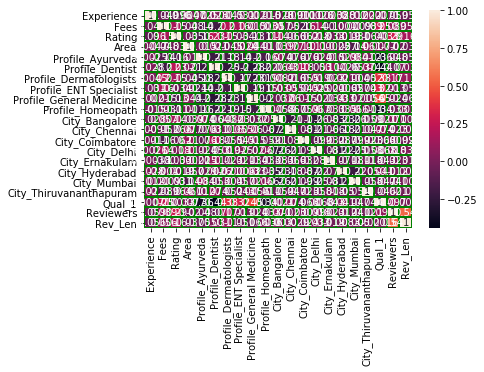

In [139]:
sn.heatmap(cor,annot=True,linewidths=1,linecolor ='green')

In [54]:
train['Area'].unique()[:10]

array(['Kakkanad', 'Whitefield', 'Mathikere - BEL', 'Bannerghatta Road',
       'Keelkattalai', 'Porur', 'Karol Bagh', 'Arekere', 'Old City',
       'Athani'], dtype=object)

In [55]:
len(test['Area'].unique())

590

In [56]:
area_list = []
set1 = set(train['Area'].unique())
set2 = set(test['Area'].unique())
temp = list(set1.union(set2))
temp = temp[1:]

In [57]:
area_df = pd.DataFrame(temp, columns = ['Area'])
area_df['Codes'] = area_df['Area'].astype('category').cat.codes
scaler = StandardScaler()
area_df['Codes'] = scaler.fit_transform(area_df['Codes'].values.reshape(-1,1))
area_codes_dict = dict(zip(area_df['Area'], area_df['Codes']))

In [59]:
train.replace({'Area': area_codes_dict}, inplace=True)
test.replace({'Area': area_codes_dict}, inplace=True)

train['Area'] = train['Area'].fillna(-1)
test['Area'] = test['Area'].fillna(-1)

In [60]:
train.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,City,Area,Profile_Ayurveda,...,Qual_591,Qual_592,Qual_593,Qual_594,Qual_595,Qual_596,Qual_597,Qual_598,Qual_599,Qual_600
0,16.0,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100.0,Ernakulam,324.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98.0,Bangalore,925.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63.0,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0.0,Bangalore,494.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0.0,Bangalore,74.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100.0,Chennai,367.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
train['Reviewers'] = train['Miscellaneous_Info'].str.split('% ').str[1].str.split(' ').str[0]
train['Reviewers'] = train['Reviewers'].fillna(0)
train['Rev_Len'] = train['Reviewers'].str.len()
train.loc[train['Rev_Len']>3, 'Reviewers'] = 0
train.loc[train['Reviewers']==',', 'Reviewers'] = 0
train['Reviewers'] = train['Reviewers'].astype(int)
scaler = StandardScaler()
train['Reviewers'] = scaler.fit_transform(train['Reviewers'].values.reshape(-1,1))
train['Reviewers'].head()

0    0.146953
1    1.650671
2   -0.254038
3   -0.254038
4   -0.153790
Name: Reviewers, dtype: float64

In [141]:
test['Reviewers'] = test['Miscellaneous_Info'].str.split('% ').str[1].str.split(' ').str[0]
test['Reviewers'] = test['Reviewers'].fillna(0)
test['Rev_Len'] = test['Reviewers'].str.len()
test.loc[test['Rev_Len']>3, 'Reviewers'] = 0
test.loc[test['Reviewers']==',', 'Reviewers'] = 0
test.loc[test['Reviewers']== None, 'Reviewers'] = 0
test['Reviewers'] = test['Reviewers'].astype(int)
test['Reviewers'] = scaler.transform(test['Reviewers'].values.reshape(-1,1))
test['Reviewers'].head()

0   -0.254038
1   -0.254038
2   -0.153790
3   -0.254038
4   -0.254038
Name: Reviewers, dtype: float64

In [66]:
selected_cols = [i for i in train.columns if i not in ['Qualification', 'Place', 'Miscellaneous_Info', 'City', 'Fees', 'Profile', 'Rev_Len', 'Experience', 'Rating']]

In [80]:
from sklearn.model_selection import train_test_split
X = train[selected_cols]
y = train['Fees']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [105]:
X=train.drop('Fees',axis=1)
y=train['Fees']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)